# Open Scholarship in Practice

James Colliander & Patrick Walls

September 29, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Example: City of Vancouver Open Data Catalogue

[City of Vancouver Open Data Catalogue](http://data.vancouver.ca/) includes crime data maintained by the Vancouver Police Department. The file `vancouver_crime_2016.csv` includes reported crimes from 2016 (excluding homicides and assault).

In [2]:
crime = pd.read_csv("vancouver_crime_2016.csv")
crime.head(10)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2016,1,30,5.0,2.0,5XX TAYLOR ST,Central Business District,492323.48,5458662.46
1,Theft from Vehicle,2016,1,30,2.0,15.0,5XX TAYLOR ST,Central Business District,492323.48,5458662.46
2,Theft from Vehicle,2016,1,7,9.0,0.0,5XX TAYLOR ST,Central Business District,492323.48,5458662.46
3,Theft from Vehicle,2016,5,29,20.0,53.0,1XX E 3RD AVE,Mount Pleasant,492531.81,5457276.01
4,Theft from Vehicle,2016,1,3,17.0,30.0,SEYMOUR ST / W GEORGIA ST,Central Business District,491480.63,5458792.38
5,Theft from Vehicle,2016,1,3,19.0,0.0,SEYMOUR ST / W GEORGIA ST,Central Business District,491480.63,5458792.38
6,Theft from Vehicle,2016,1,14,13.0,30.0,SEYMOUR ST / W GEORGIA ST,Central Business District,491480.63,5458792.38
7,Theft from Vehicle,2016,1,19,13.0,15.0,SEYMOUR ST / W GEORGIA ST,Central Business District,491480.63,5458792.38
8,Theft from Vehicle,2016,1,22,7.0,15.0,SEYMOUR ST / W GEORGIA ST,Central Business District,491480.63,5458792.38
9,Theft from Vehicle,2016,1,25,19.0,30.0,SEYMOUR ST / W GEORGIA ST,Central Business District,491480.63,5458792.38


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34622 entries, 0 to 34621
Data columns (total 10 columns):
TYPE             34622 non-null object
YEAR             34622 non-null int64
MONTH            34622 non-null int64
DAY              34622 non-null int64
HOUR             34622 non-null float64
MINUTE           34622 non-null float64
HUNDRED_BLOCK    34622 non-null object
NEIGHBOURHOOD    34522 non-null object
X                34622 non-null float64
Y                34622 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.6+ MB


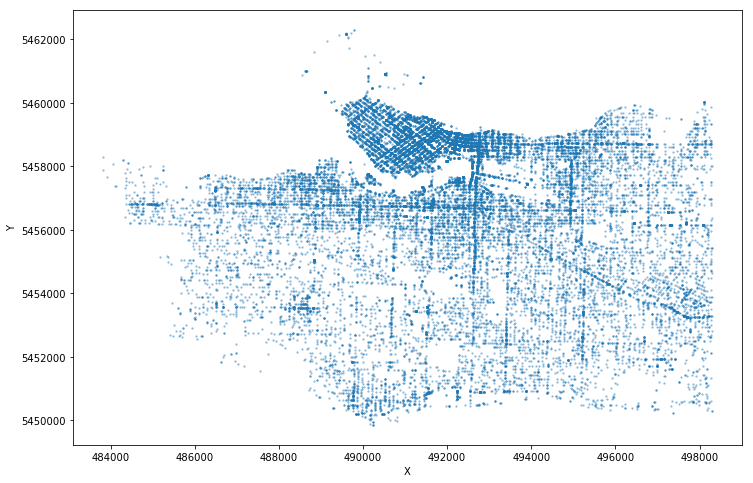

In [4]:
crime.plot(kind='scatter',x="X",y="Y",s=5,lw=0,alpha=0.5,figsize=(12,8));

### Crime rate by time of day

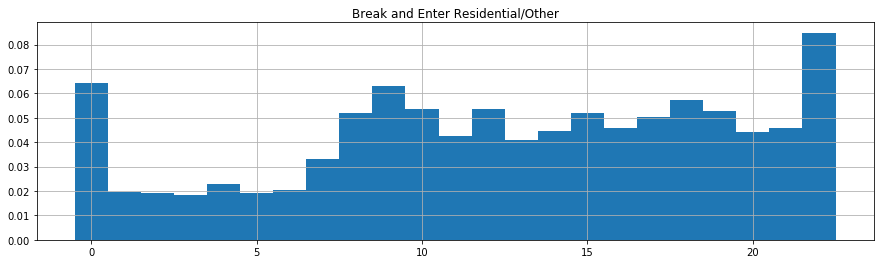

In [5]:
crime_types = crime['TYPE'].unique()
index = 5
selected_crime = crime[crime['TYPE'] == crime_types[index]]
selected_crime['HOUR'].hist(bins=23,normed=True,align='left',figsize=(15,4))
plt.title(crime_types[index]);

## Example: History of the Federal Electoral Ridings, 1867-2010

The [History of the Federal Electoral Ridings, 1867-2010](http://open.canada.ca/data/en/dataset/ea8f2c37-90b6-4fee-857e-984d3060184e) data set is available on the [Government of Canada Open Data Portal](http://open.canada.ca/en/open-data).

In [6]:
elections = pd.read_csv("elections.csv",encoding="latin")
elections.head()

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected
0,1867-08-07,Gen,1,New Brunswick,ALBERT,WALLACE,John,NaN,farmer,Liberal,778,52.14,1
1,1867-08-07,Gen,1,New Brunswick,ALBERT,STEVENS,Henry J.,NaN,NaN,Unknown,714,47.86,0
2,1867-08-07,Gen,1,New Brunswick,CARLETON,CONNELL,Hon. Charles,NaN,general merchant,Liberal,accl.,NaN,1
3,1867-08-07,Gen,1,New Brunswick,CHARLOTTE,BOLTON,John,NaN,businessman,Liberal,1214,56.94,1
4,1867-08-07,Gen,1,New Brunswick,CHARLOTTE,THOMPSON,Robert,NaN,NaN,Unknown,918,43.06,0


In [7]:
elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38777 entries, 0 to 38776
Data columns (total 13 columns):
Election Date    38777 non-null object
Election Type    38777 non-null object
Parliament       38777 non-null int64
Province         38777 non-null object
Riding           38777 non-null object
Last Name        38777 non-null object
First Name       38545 non-null object
Gender           5443 non-null object
Occupation       36469 non-null object
Party            38777 non-null object
Votes            38742 non-null object
Votes (%)        38119 non-null float64
Elected          38777 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 3.8+ MB


### Most seats won by party

In [8]:
parties = elections.groupby('Party')['Elected'].sum().sort_values(ascending=False)
parties.head(10)

Party
Liberal                                 5015
Progressive Conservative                1777
Conservative                            1684
New Democratic Party                     407
Conservative Party of Canada             368
Liberal-Conservative                     315
Bloc Québécois                           297
Social Credit Party of Canada            177
Government                               156
Co-operative Commonwealth Federation     121
Name: Elected, dtype: int64

### Women elected to Parliament

In [9]:
elected_women = elections[(elections['Gender'] == 'F') & (elections['Elected'] == 1)]
elected_women.head(10)

,Election Date,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected
6715,1921/12/06,Gen,14,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes Campbell,F,schoolteacher and farmer,Progressive,6958,49.86,1
7388,1925/10/29,Gen,15,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes C.,F,schoolteacher and farmer,Progressive,6652,55.91,1
7956,1926/09/14,Gen,16,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes Campbell,F,schoolteacher and farmer,Progressive,7939,56.11,1
8531,1930/07/28,Gen,17,Ontario,GREY SOUTHEAST,MACPHAIL,Agnes Campbell,F,schoolteacher and farmer,Progressive,6619,50.93,1
9289,1935/10/14,Gen,18,Ontario,GREY--BRUCE,MACPHAIL,Agnes C.,F,schoolteacher,United Farmers of Ontario-Labour,7210,39.97,1
9821,1935/10/14,Gen,18,Yukon,YUKON,BLACK,Martha Louise,F,married woman,Independent Conservative,696,55.64,1
10515,1940/03/26,Gen,19,Saskatchewan,NORTH BATTLEFORD,NIELSEN,Dorise W.,F,housewife,Unity,10500,57.16,1
10565,1941/06/02,B/P,19,Alberta,EDMONTON EAST,CASSELMAN,Cora T.,F,widow,Liberal,7306,51.78,1
11520,1945/06/11,Gen,20,Saskatchewan,QU'APPELLE,STRUM,Gladys,F,housewife,Co-operative Commonwealth Federation,6146,37.40,1
12494,1950/05/15,B/P,21,Ontario,HAMILTON WEST,FAIRCLOUGH,Ellen L.,F,accountant,Progressive Conservative,8008,42.49,1


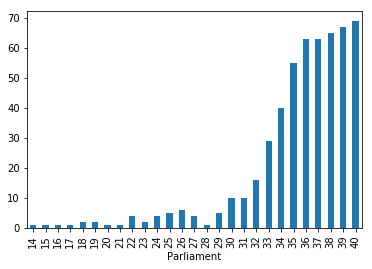

In [10]:
elected_women.groupby('Parliament').size().plot(kind='bar');